The purpose of this exercise is to understand Exploratory Data Analysis, we will practice the EDA by working on multiple datasets which have different characteristics.

## The fourth Lab-assignment (02/17/2022, 50 points in total)

Question 1 (15 points). Understand a text corpus for domain-specific text classification. Download the dataset from the following link: https://osf.io/8mjcy/ . Conduct EDA of the dataset from the following aspects:

(1) How many categories in total?

(2) How many documents under each category?

(3) What is the avergae number of sentence (on average)?

(4) What is the average number of words (on average)?

(5) Visualize the top 50 terms and rank the terms by frquency (remove stop words first: https://gist.github.com/sebleier/554280).

In [ ]:
from zipfile import ZipFile
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#Reading the zip file and obtaining files information
with ZipFile("preprocessed_cases[cases_29404].zip",'r') as zip1:
  file_info_list=zip1.infolist()

#Getting all the folders inside parent folder
Categories=[]
parent_dir='preprocessed_cases[cases_29404]/'
for file_info in file_info_list:
  if(file_info.is_dir() and file_info.filename!=parent_dir):
    Categories.append(int(file_info.filename.split('/')[-2]))
print('1)Total number of Categories is', len(Categories))

#The file for each category
Categories.sort()
for Category in Categories:
  documents_count=0
  for file_info in file_info_list:
   if(file_info.is_dir()==False and file_info.filename.startwith(parent_dir+str(Category)+'/')
     (documents_count)+  1
print(' Total number of docuents in {}Category is {}'.format(Category, documents_count))

#Declaring the required variables
sentence_count=0
file_count=0
words[]
stop_words=stopwords('english')



SyntaxError: ignored

#import the required modules
from zipfile import ZipFile
from collections import Counter
import nltk
from nltk.corpus import stopwords
# To read the the zip file, and obtain files info,
with ZipFile('preprocessed_cases[cases_29404].zip'):
  file_info_list=zipObj.infolist()
# To get all the folders inside the parent folder,
categories=[]
parent_dir= 'preprocessed_cases[cases_29404]/'
for file_info in file_info_list:
  if(file_info.is_dir() and file_info.filename!= parent_dir):
    categories.append(int(file_info.filename.split('/')[-2]))
print('1) Total number of categories is', len(categories))
# The files under each category
categories.sort()
for category in categories:
  documents_count=0
  for file_info in file_info_list:
   if(file_info.is_dir()==False and file_info.filename.startswith(parent_dir+str(category)+'/')
     (documents_count)+1
print('Total number of documents in {} category is {}').documents_count)
# Declaring the required variables
  sentence_count=0
file_count=0
words=[]
stop_words=stopwords.words('english')
    
      


 







Question 2 (20 points). Continue practicing how to do simple exploratory data analysis with Python. The dataset that has been used in this question is called Student Academics Performance Data Set, which can be downloaded at: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/lab-assignment-04-student-performance.csv . Please conduct the following analysis:

(1) Description of all the columns: for each colmun, count number of rows, number of unqiue element, the frequency of each unqiue element. 


(2)  Visualize the count for each value in the 'Study Hours' column. Note: Study Hours values comes from this >= 6 hours Good >= 4 hours Average < 2 hours Poor.

(3) Using factorplot to show the relationship between numerical and categorical value. Please use figure to show relation between [Study Hours] and [End Semester Percentage]. Percentage is calculated based on the following:

if percentage >=80 then Best
If percentage >= 60 but less than 80 then Very Good
If percentage >= 45 but less than 60 then Good
If Percentage >= 30 but less than 45 then Pass
If Percentage < 30 then Fail

(4) Get the correlation from the data, then plug it to heatmap function and show it as following:

![heatmap.png](attachment:heatmap.png)

In [ ]:
import seaborn as sns

1. EDA
---------------
Column: ge
---------------
The number of Rows is: 131
The number of unique elements is: 2
The frequency of each unique element is:
M    72
F    59


---------------
Column: cst
---------------
The number of Rows is: 131
The number of unique elements is: 5
The frequency of each unique element is:
OBC     57
G       44
ST      20
MOBC     6
SC       4


---------------
Column: tnp
---------------
The number of Rows is: 131
The number of unique elements is: 4
The frequency of each unique element is:
Good    59
Vg      38
Pass    25
Best     9


---------------
Column: twp
---------------
The number of Rows is: 131
The number of unique elements is: 4
The frequency of each unique element is:
Good    65
Vg      44
Pass    17
Best     5


---------------
Column: iap
---------------
The number of Rows is: 131
The number of unique elements is: 4
The frequency of each unique element is:
Vg      63
Good    53
Best     8
Pass     7


---------------
Column: esp
-------------

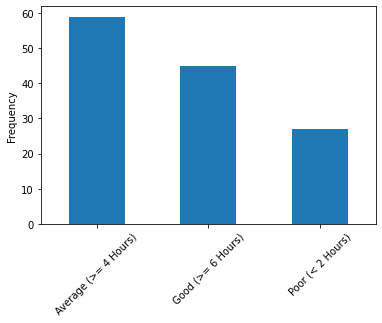


3. The Factor Plot


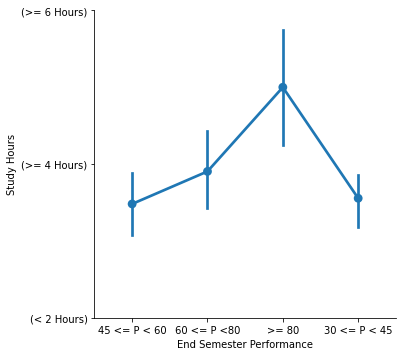


4. Correlation Heatmap


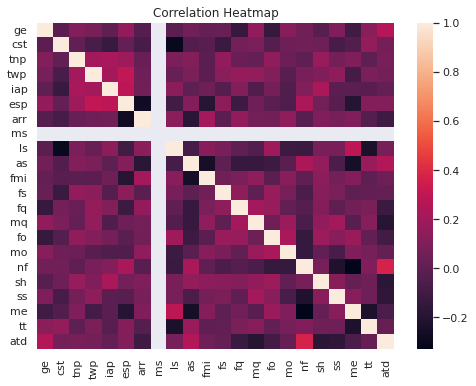

In [ ]:
df_data=pd.read_csv('lab-assignment-04-student-performance.csv')
df = df_data.copy() # Create a copy of the original DataFrame
# 1. Description of all the columns
print("1. EDA")
for column in df.columns:
    print("---------------")
    print("Column:",column)
    print("---------------")
    print("The number of Rows is:",len(df[column]))
    print("The number of unique elements is:",len(df[column].unique()))
    print(f"The frequency of each unique element is:\n{df[column].value_counts().to_string()}")
    print("\n")

# 2. Visualize the count of each value in the Study Hours column.
print("\n2. Visualize Study Hours Column")
df['sh'].value_counts().plot(kind = 'bar')
plt.ylabel("Frequency")
plt.xticks(ticks = [0,1,2], 
           labels = ["Average (>= 4 Hours)", "Good (>= 6 Hours)", "Poor (< 2 Hours)"], rotation = 45)
plt.show()

# 3. Using factor plot to represent r/ship between Numerical and Categorical Value
### Create two new columns where study hours has been mapped to numerical values and
### End semester performance has been mapped to a categorized values
dict_1 = {'Best':'>= 80', 'Vg':'60 <= P <80', 'Good':'45 <= P < 60','Pass':'30 <= P < 45','Fail':'< 30'}
dict_2 = {'Good':3, "Average":2, "Poor":1}

df['nesp'] = df['esp'].map(dict_1)
df['nsh'] = df['sh'].map(dict_2)

########### THE FACTORPLOT #########

#### the 'sns.factorplot' is going to be REMOVED in the future, so we will default to catplot and set the argument
#### kind = 'point'
print("\n3. The Factor Plot")
sns.catplot(x='nesp', y = 'nsh', data=df, kind='point')
plt.xlabel("End Semester Performance")
plt.ylabel("Study Hours")
plt.yticks(ticks = [1,2,3], labels = ["(< 2 Hours)","(>= 4 Hours)", "(>= 6 Hours)"])
plt.show()

# Finding the correlation of the Variables
print("\n4. Correlation Heatmap")
corr = df_data.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

# Plugging them into the heat map
sns.set(rc={'figure.figsize':(8, 6)}) # Set a big figure for more clarity
sns.heatmap(corr)
plt.title("Correlation Heatmap")
plt.show()
















Question 3 (15 points). Download a dataset from Kaggle or other sources. Propose three questions that you wanna to know from the dataset, then write python code to conduct EDA analysis to answer the three questions

In [ ]:
# Your three questions:

#1. What is the distribution of the sales price?
#2. What is the median value of the sales price?
#3. How correlated are the building characteristics with the SalePrice?






In [ ]:
# You code to answer the three questions (Please add comments in the code):


import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import io
from google.colab import files
uploaded=files.upload()
df=pd.read_excel(io.BytesIO(uploaded['data.xlsx']))
df





Saving data.xlsx to data (2).xlsx


,Id,LotArea,OverallQual,BsmtFinSF1,TotalBsmtSF,GrLivArea,GarageCars,YrSold,SalePrice
0,1,8450,7,706,856,1710,2,2008,208500
1,2,9600,6,978,1262,1262,2,2007,181500
2,3,11250,7,486,920,1786,2,2008,223500
3,4,9550,7,216,756,1717,3,2006,140000
4,5,14260,8,655,1145,2198,3,2008,250000
...,...,...,...,...,...,...,...,...,...
1455,1456,7917,6,0,953,1647,2,2007,175000
1456,1457,13175,6,790,1542,2073,2,2010,210000
1457,1458,9042,7,275,1152,2340,1,2010,266500
1458,1459,9717,5,49,1078,1078,1,2010,142125


In [ ]:
df.isnull().sum()

Id             0
LotArea        0
OverallQual    0
BsmtFinSF1     0
TotalBsmtSF    0
GrLivArea      0
GarageCars     0
YrSold         0
SalePrice      0
dtype: int64

Text(0.5, 0, 'SalePrice')

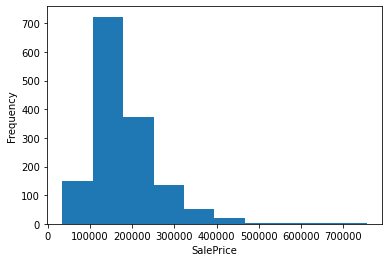

In [ ]:
df['SalePrice'].plot(
    kind='hist'
)
plt.xlabel('SalePrice')

# The didtribution of salePrice is right skewed.

Text(0.5, 1.0, 'Boxplot of Sale Price')

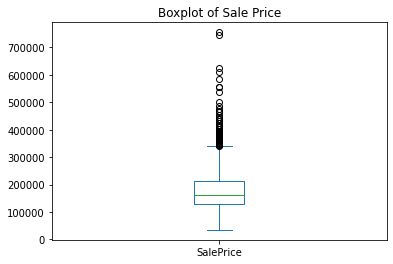

In [ ]:
df['SalePrice'].plot(
    kind='box'
)
plt.xlabel('')
plt.title('Boxplot of Sale Price')

The median value is around 150, 000.

In [ ]:
import seaborn as sns 
import statsmodels.api as sm
import statsmodels.formula.api as smf


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 1440x864 with 0 Axes>

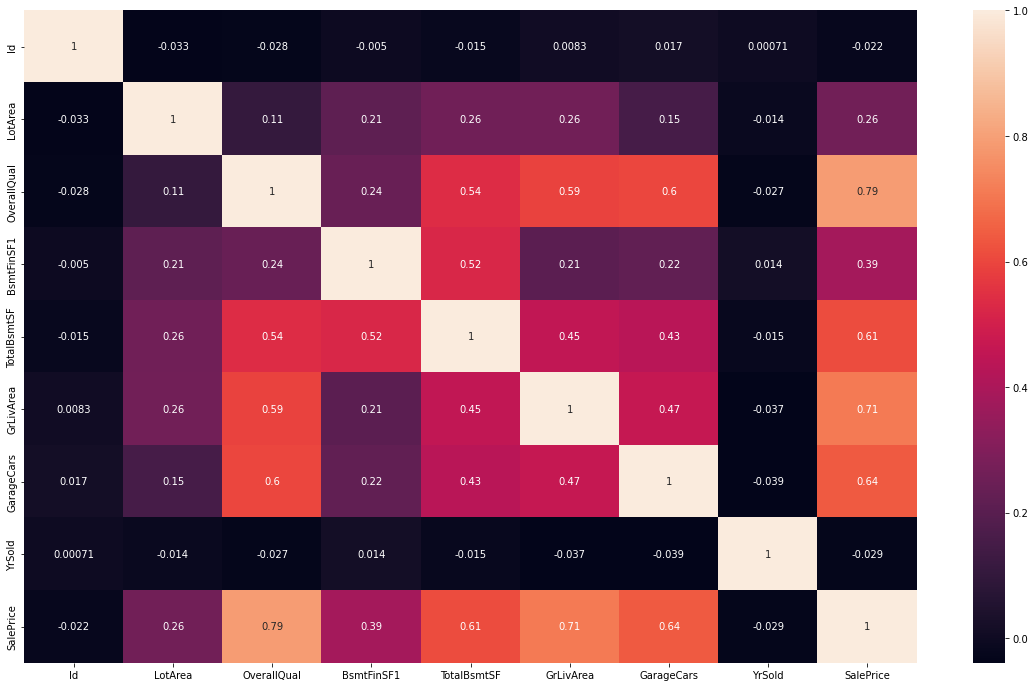

In [ ]:
plt.figure(figsize =(20,12))
plt.figure(figsize = (20,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

The SalePrice has a positive relationship with all the building characterics except the year sold. Among them, the relationship between the SalePrice and the overall quality is high(0.79) as well as Garrage Area (0.71). 